# Import the Libs

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score


# load the data 

In [2]:
online_retail_df = pd.read_csv('online_retail.csv')
online_retail_df_2 = pd.read_csv('online_retail_2.csv')

In [3]:
online_retail_df.head()
online_retail_df.shape

(541909, 8)

In [4]:
online_retail_df_2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


### Change columns name to be the same between the 2 datasets

In [5]:
online_retail_df.columns = ['Invoice','StockCode','Description','Quantity','InvoiceDate','Price','CustomerID','Country']
online_retail_df_2.columns = ['Invoice','StockCode','Description','Quantity','InvoiceDate','Price','CustomerID','Country']


In [6]:
online_retail_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
online_retail_df_2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


### Merge the 2 Datasets in one large dataset

In [8]:
retail_df = pd.merge(online_retail_df_2,online_retail_df,how='outer')

In [9]:
retail_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [10]:
retail_df.shape

(1045545, 8)

In [11]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045545 entries, 0 to 1045544
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1045545 non-null  object 
 1   StockCode    1045545 non-null  object 
 2   Description  1041270 non-null  object 
 3   Quantity     1045545 non-null  int64  
 4   InvoiceDate  1045545 non-null  object 
 5   Price        1045545 non-null  float64
 6   CustomerID   810256 non-null   float64
 7   Country      1045545 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 63.8+ MB


In [12]:
#change datatype of the Invoice to date-time
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045545 entries, 0 to 1045544
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1045545 non-null  object        
 1   StockCode    1045545 non-null  object        
 2   Description  1041270 non-null  object        
 3   Quantity     1045545 non-null  int64         
 4   InvoiceDate  1045545 non-null  datetime64[ns]
 5   Price        1045545 non-null  float64       
 6   CustomerID   810256 non-null   float64       
 7   Country      1045545 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 63.8+ MB


In [13]:
#Create a new Column with the Date only without the Time
retail_df['Date'] = retail_df['InvoiceDate'].dt.date

In [14]:
#drop the Invoice data as we need only the date 
retail_df.drop(columns='InvoiceDate',inplace=True)

retail_df

,Invoice,StockCode,Description,Quantity,Price,CustomerID,Country,Date
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,2009-12-01
...,...,...,...,...,...,...,...,...
1045540,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,2011-12-09
1045541,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,2011-12-09
1045542,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,2011-12-09
1045543,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,2011-12-09


In [15]:
#Calculate the sum of null values
retail_df.isnull().sum()

Invoice             0
StockCode           0
Description      4275
Quantity            0
Price               0
CustomerID     235289
Country             0
Date                0
dtype: int64

In [16]:
#remove all the null values(that won't affect our data too much as we have a very large dataset)
retail_df_cleaned = retail_df.dropna(subset=['CustomerID','Description'])
retail_df_cleaned

,Invoice,StockCode,Description,Quantity,Price,CustomerID,Country,Date
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,2009-12-01
...,...,...,...,...,...,...,...,...
1045540,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,2011-12-09
1045541,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,2011-12-09
1045542,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,2011-12-09
1045543,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,2011-12-09


In [17]:
retail_df_cleaned.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
Price          0
CustomerID     0
Country        0
Date           0
dtype: int64

In [18]:
#figure out which country had the biggest number of orders
cntr_dis = retail_df_cleaned['Country'].value_counts()
cntr_dis

Country
United Kingdom          728359
Germany                  17363
EIRE                     16029
France                   13930
Netherlands               5138
Spain                     3766
Belgium                   3111
Switzerland               3058
Portugal                  2424
Australia                 1891
Channel Islands           1647
Italy                     1509
Sweden                    1345
Norway                    1308
Cyprus                    1176
Finland                   1049
Austria                    938
Denmark                    797
Greece                     663
Japan                      565
USA                        535
Poland                     527
Unspecified                524
United Arab Emirates       386
Singapore                  346
Israel                     324
Malta                      299
Canada                     228
Iceland                    222
Lithuania                  154
RSA                        123
Brazil                      94


In [19]:
retail_df_cleaned['Invoice'].value_counts()

Invoice
576339     542
579196     533
580727     529
578270     442
573576     435
          ... 
544079       1
512172       1
504932       1
C552876      1
555580       1
Name: count, Length: 44876, dtype: int64

In [20]:
#remove the returned items as they will show our data in negative
retail_df_cleaned = retail_df_cleaned[~retail_df_cleaned["Invoice"].str.contains('C',na=False)]

In [21]:
retail_df_cleaned

,Invoice,StockCode,Description,Quantity,Price,CustomerID,Country,Date
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,2009-12-01
...,...,...,...,...,...,...,...,...
1045540,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,2011-12-09
1045541,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,2011-12-09
1045542,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,2011-12-09
1045543,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,2011-12-09


In [22]:
#calculate how many sales each product got 
retail_df_cleaned.groupby('Description').agg({"Quantity":"sum"}).sort_values("Quantity",ascending=False).head()

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,105425
WHITE HANGING HEART T-LIGHT HOLDER,91877
"PAPER CRAFT , LITTLE BIRDIE",80995
ASSORTED COLOUR BIRD ORNAMENT,78461
MEDIUM CERAMIC TOP STORAGE JAR,77916


In [23]:
#Create  a Total price column
retail_df_cleaned["TotalPrice"] = retail_df_cleaned['Quantity'] * retail_df_cleaned['Price']
retail_df_cleaned.head()

C:\Users\Soufiane\AppData\Local\Temp\ipykernel_30792\4156878694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_df_cleaned["TotalPrice"] = retail_df_cleaned['Quantity'] * retail_df_cleaned['Price']


,Invoice,StockCode,Description,Quantity,Price,CustomerID,Country,Date,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,2009-12-01,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,2009-12-01,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,2009-12-01,30.0


In [24]:
retail_df_cleaned.to_csv('retail_cleaned.csv', index=False)
retail_df_cleaned.tail()

,Invoice,StockCode,Description,Quantity,Price,CustomerID,Country,Date,TotalPrice
1045540,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,2011-12-09,10.20
1045541,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,2011-12-09,12.60
1045542,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,2011-12-09,16.60
1045543,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,2011-12-09,16.60
1045544,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,4.95,12680.0,France,2011-12-09,14.85


In [25]:
retail_df_cleaned["Date"] = pd.to_datetime(retail_df_cleaned['Date'], errors='coerce')

C:\Users\Soufiane\AppData\Local\Temp\ipykernel_30792\283810040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_df_cleaned["Date"] = pd.to_datetime(retail_df_cleaned['Date'], errors='coerce')


In [26]:
#Create a variable for the nearest sale date
today_date = dt.datetime(2011, 12, 11)

In [27]:
#Froup our date into the rfm datafarme
rfm = retail_df_cleaned.groupby("CustomerID").agg({"Date": lambda date: (today_date - date.max()).days,
                                                   "Invoice" : lambda num: num.nunique(),
                                                   "TotalPrice": lambda TotalPrice: TotalPrice.sum()})

In [28]:
rfm

,Date,Invoice,TotalPrice
CustomerID,,,
12346.0,327,12,77556.46
12347.0,4,8,4921.53
12348.0,77,5,2019.40
12349.0,20,4,4428.69
12350.0,312,1,334.40
...,...,...,...
18283.0,5,22,2736.65
18284.0,433,1,461.68
18285.0,662,1,427.00


In [29]:
#change the names of the columns 
rfm.columns = ["Recency","Frequency","Monetary"]
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,327,12,77556.46
12347.0,4,8,4921.53
12348.0,77,5,2019.40
12349.0,20,4,4428.69
12350.0,312,1,334.40
...,...,...,...
18283.0,5,22,2736.65
18284.0,433,1,461.68
18285.0,662,1,427.00


In [30]:
#Remove the sCustomers who got a negative total sales 
rfm = rfm[rfm["Monetary"]>0]
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,327,12,77556.46
12347.0,4,8,4921.53
12348.0,77,5,2019.40
12349.0,20,4,4428.69
12350.0,312,1,334.40
...,...,...,...
18283.0,5,22,2736.65
18284.0,433,1,461.68
18285.0,662,1,427.00


In [31]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,5878.0,202.866791,209.353961,2.00,27.000,97.00,381.00,740.00
Frequency,5878.0,6.289895,13.015651,1.00,1.000,3.00,7.00,398.00
Monetary,5878.0,2965.995733,14446.744318,2.95,344.645,869.14,2261.56,580987.04


In [32]:
#Create the RFM scores
rfm["recency_score"] = pd.qcut(rfm["Recency"],5,labels=[5,4,3,2,1])
rfm["frequency_score"] = pd.qcut(rfm["Frequency"].rank(method="first"),5,labels=[1,2,3,4,5])
rfm["monetary_score"] = pd.qcut(rfm["Monetary"],5,labels=[1,2,3,4,5])
rfm

C:\Users\Soufiane\AppData\Local\Temp\ipykernel_30792\1593390851.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm["recency_score"] = pd.qcut(rfm["Recency"],5,labels=[5,4,3,2,1])
C:\Users\Soufiane\AppData\Local\Temp\ipykernel_30792\1593390851.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm["frequency_score"] = pd.qcut(rfm["Frequency"].rank(method="first"),5,labels=[1,2,3,4,5])
C:\Users\Soufiane\AppData\Local\Temp\ipykernel_30792\1593390851.py:4: SettingWithCopyWarning: 
A value is trying to be 

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score
CustomerID,,,,,,
12346.0,327,12,77556.46,2,5,5
12347.0,4,8,4921.53,5,4,5
12348.0,77,5,2019.40,3,4,4
12349.0,20,4,4428.69,5,3,5
12350.0,312,1,334.40,2,1,2
...,...,...,...,...,...,...
18283.0,5,22,2736.65,5,5,4
18284.0,433,1,461.68,1,2,2
18285.0,662,1,427.00,1,2,2


In [33]:
#Ca;culate the RFM_score
rfm["RFM_score"] = rfm["recency_score"].astype(int)*10 + rfm["frequency_score"].astype(int)

C:\Users\Soufiane\AppData\Local\Temp\ipykernel_30792\2010654694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm["RFM_score"] = rfm["recency_score"].astype(int)*10 + rfm["frequency_score"].astype(int)


In [34]:
rfm

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_score
CustomerID,,,,,,,
12346.0,327,12,77556.46,2,5,5,25
12347.0,4,8,4921.53,5,4,5,54
12348.0,77,5,2019.40,3,4,4,34
12349.0,20,4,4428.69,5,3,5,53
12350.0,312,1,334.40,2,1,2,21
...,...,...,...,...,...,...,...
18283.0,5,22,2736.65,5,5,4,55
18284.0,433,1,461.68,1,2,2,12
18285.0,662,1,427.00,1,2,2,12


In [35]:
#Label each category by it's name
rfm['RFM_score']=rfm["RFM_score"].astype(str)
seg_cst = {
    r'[1-2][1-2]' : 'Disinterested',
    r'[1-2][3-4]' :'Unengaged',
    r'[1-2]5' :'Occasional',
    r'[3][1-2]' :'Infrequent',
    r'33' :'Need_attention',
    r'[3-4][4-5]' :'Loyal',
    r'41' :'Committed',
    r'51' :'New',
    r'[4-5][2-3]' :'Loyal',
    r'5[4-5]' :'Devoted'
}
rfm["segment"] = rfm['RFM_score'].replace(seg_cst,regex=True)
rfm.head()

C:\Users\Soufiane\AppData\Local\Temp\ipykernel_30792\2117844078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['RFM_score']=rfm["RFM_score"].astype(str)
C:\Users\Soufiane\AppData\Local\Temp\ipykernel_30792\2117844078.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm["segment"] = rfm['RFM_score'].replace(seg_cst,regex=True)


,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_score,segment
CustomerID,,,,,,,,
12346.0,327,12,77556.46,2,5,5,25,Occasional
12347.0,4,8,4921.53,5,4,5,54,Devoted
12348.0,77,5,2019.40,3,4,4,34,Loyal
12349.0,20,4,4428.69,5,3,5,53,Loyal
12350.0,312,1,334.40,2,1,2,21,Disinterested


In [36]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5878 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Recency          5878 non-null   int64   
 1   Frequency        5878 non-null   int64   
 2   Monetary         5878 non-null   float64 
 3   recency_score    5878 non-null   category
 4   frequency_score  5878 non-null   category
 5   monetary_score   5878 non-null   category
 6   RFM_score        5878 non-null   object  
 7   segment          5878 non-null   object  
dtypes: category(3), float64(1), int64(2), object(2)
memory usage: 293.4+ KB


In [37]:
rfm['RFM_score'] = rfm['RFM_score'].apply(pd.to_numeric, errors='coerce')

C:\Users\Soufiane\AppData\Local\Temp\ipykernel_30792\3933927481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['RFM_score'] = rfm['RFM_score'].apply(pd.to_numeric, errors='coerce')


In [38]:
rfm[['segment','Recency','Frequency','Monetary']].groupby("segment").agg(['mean','count','max']).round()

Recency            Frequency            Monetary        \
                  mean count  max      mean count  max     mean count   
segment                                                                 
Committed         40.0   110   60       1.0   110    1    324.0   110   
Devoted           10.0   852   21      19.0   852  398  10573.0   852   
Disinterested    461.0  1522  740       1.0  1522    2    432.0  1522   
Infrequent       109.0   388  191       1.0   388    2    530.0   388   
Loyal             53.0  1860  191       7.0  1860  107   2995.0  1860   
Need_attention   115.0   269  191       3.0   269    4   1277.0   269   
New               12.0    56   21       1.0    56    1    356.0    56   
Occasional       333.0    71  578      16.0    71  155   8115.0    71   
Unengaged        375.0   750  735       4.0   750    8   1356.0   750   

                          
                     max  
segment                   
Committed         1636.0  
Devoted         580987.0  
Disinterested    13916.0  
Infrequent        5416.0  
Loyal           168472.0  
Need_attention   39916.0  
New               3861.0  
Occasional       77556.0  
Unengaged        44534.0

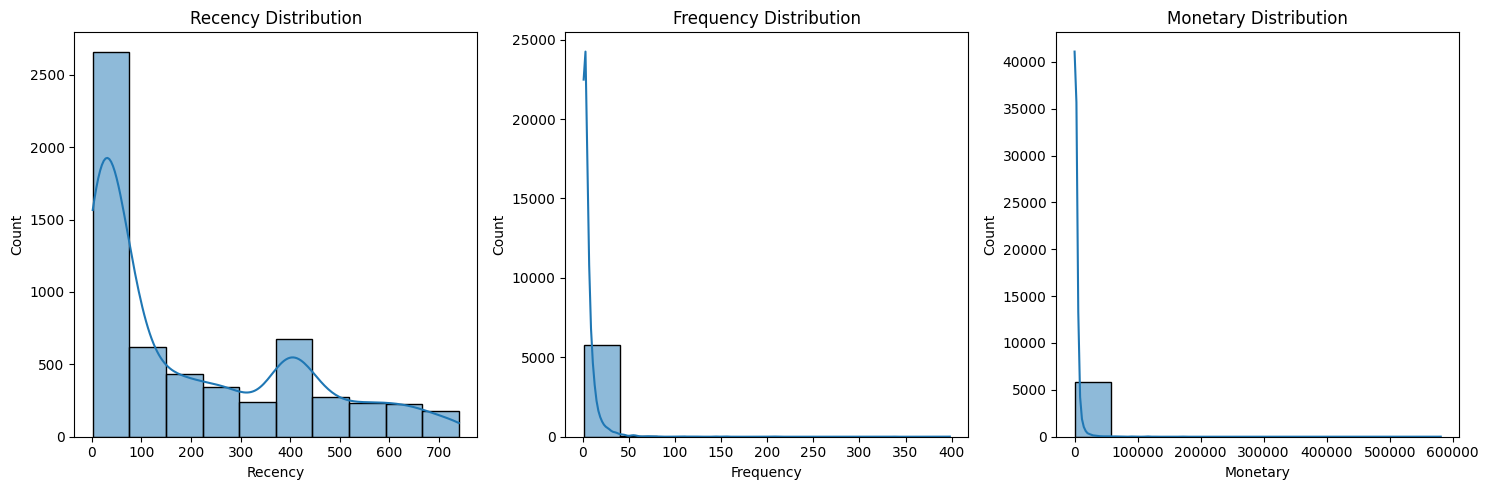

In [39]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], bins=10, kde=True)
plt.title('Recency Distribution')

plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], bins=10, kde=True)
plt.title('Frequency Distribution')

plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary'], bins=10, kde=True)
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

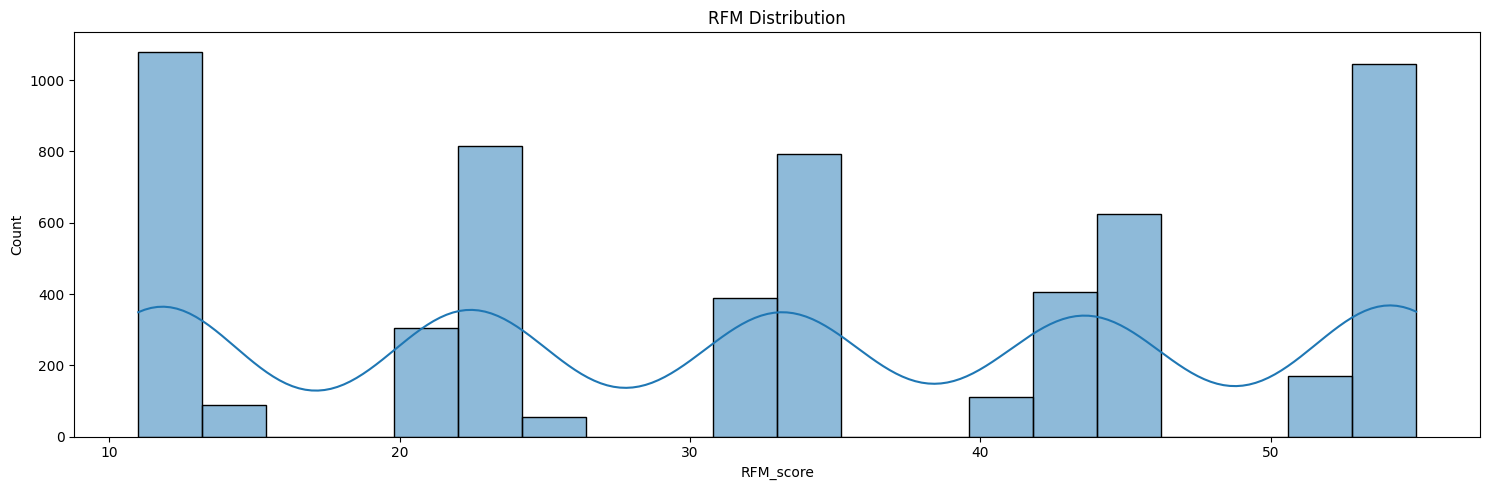

In [40]:
plt.figure(figsize=(15, 5))
sns.histplot(rfm['RFM_score'], bins=20, kde=True)
plt.title('RFM Distribution')
plt.tight_layout()
plt.show()

In [41]:
rfm.to_csv('rfm_df.csv', index=False)

# Modeling 

In [42]:
rfm_ml = rfm.drop(columns='segment')
rfm_ml.head()


,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_score
CustomerID,,,,,,,
12346.0,327,12,77556.46,2,5,5,25
12347.0,4,8,4921.53,5,4,5,54
12348.0,77,5,2019.40,3,4,4,34
12349.0,20,4,4428.69,5,3,5,53
12350.0,312,1,334.40,2,1,2,21


In [43]:
#cahnge datatype to numerical
rfm_ml['recency_score'] = pd.to_numeric(rfm_ml['recency_score'], errors='ignore')
rfm_ml['frequency_score'] = pd.to_numeric(rfm_ml['frequency_score'], errors='ignore')
rfm_ml['monetary_score'] = pd.to_numeric(rfm_ml['monetary_score'], errors='ignore')
rfm_ml['RFM_score'] = pd.to_numeric(rfm_ml['RFM_score'], errors='ignore')
rfm_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5878 entries, 12346.0 to 18287.0
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Recency          5878 non-null   int64  
 1   Frequency        5878 non-null   int64  
 2   Monetary         5878 non-null   float64
 3   recency_score    5878 non-null   int64  
 4   frequency_score  5878 non-null   int64  
 5   monetary_score   5878 non-null   int64  
 6   RFM_score        5878 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 367.4 KB


In [44]:
X = rfm_ml[['Recency', 'Frequency', 'Monetary']] 
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Train-test split
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)


## KNN
in this algorithm The choice of 'k' (number of neighbors) is crucial for accuracy. as depending owe will select how many neighbors there are for each points
so now we will use a for loop to iterate between diffrent k to see which one will give us the better score

In [45]:
best_score_knn = -1
best_kmeans = None
best_n_clusters = None

# Evaluate different numbers of clusters
for n_clusters in [2, 3, 4, 5, 6]:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, random_state=2)
    kmeans_labels = kmeans.fit_predict(X_test)
    score = silhouette_score(X_test, kmeans_labels)
    if score > best_score_knn:
        best_score_knn = score
        best_kmeans = kmeans
        best_n_clusters = n_clusters

print(f"K-Means Best Number of Clusters: {best_n_clusters}")
print(f"K-Means Silhouette Score: {best_score_knn}")

K-Means Best Number of Clusters: 5
K-Means Silhouette Score: 0.6193993749491286


## Agglomeractive Clustering 

In [46]:
best_score_aggclu = -1
best_model = None
best_params = None

# Evaluate different configurations
for n_clusters in [2, 3, 4, 5, 6]:
    for linkage in ['ward', 'complete', 'average']:
        model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        labels = model.fit_predict(X_test)
        score = silhouette_score(X_test, labels)
        if score > best_score_aggclu:
            best_score_aggclu = score
            best_model = model
            best_params = {'n_clusters': n_clusters, 'linkage': linkage}

print(f"Hierarchical Clustering Best Params: {best_params}")
print(f"Hierarchical Clustering Silhouette Score: {best_score_aggclu}")

Hierarchical Clustering Best Params: {'n_clusters': 2, 'linkage': 'ward'}
Hierarchical Clustering Silhouette Score: 0.9525054246690439


## DBSCAN

In [47]:
best_score_dbscan = -1
best_dbscan = None
best_params = None

# Evaluate different parameters
for eps in [0.3, 0.5, 0.7, 1.0]:
    for min_samples in [5, 10, 15]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_test)
        if len(set(labels)) > 1:  # At least 2 clusters should be present for silhouette score
            score = silhouette_score(X_test, labels)
            if score > best_score_dbscan:
                best_score_dbscan = score
                best_dbscan = dbscan
                best_params = {'eps': eps, 'min_samples': min_samples}

print(f"DBSCAN Best Params: {best_params}")
print(f"DBSCAN Silhouette Score: {best_score_dbscan}")

DBSCAN Best Params: {'eps': 1.0, 'min_samples': 5}
DBSCAN Silhouette Score: 0.8880747971430898


## Gaussian Mixture

In [48]:
best_score_gauss = -1
best_gmm = None
best_params = None

# Evaluate different configurations
for n_components in [2, 3, 4, 5, 6]:
    for covariance_type in ['full', 'tied', 'diag', 'spherical']:
        gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type, random_state=2)
        gmm_labels = gmm.fit_predict(X_test)
        score = silhouette_score(X_test, gmm_labels)
        if score > best_score_gauss:
            best_score_gauss = score
            best_gmm = gmm
            best_params = {'n_components': n_components, 'covariance_type': covariance_type}

print(f"GMM Best Params: {best_params}")
print(f"GMM Silhouette Score: {best_score_gauss}")

GMM Best Params: {'n_components': 5, 'covariance_type': 'tied'}
GMM Silhouette Score: 0.6135306534626208


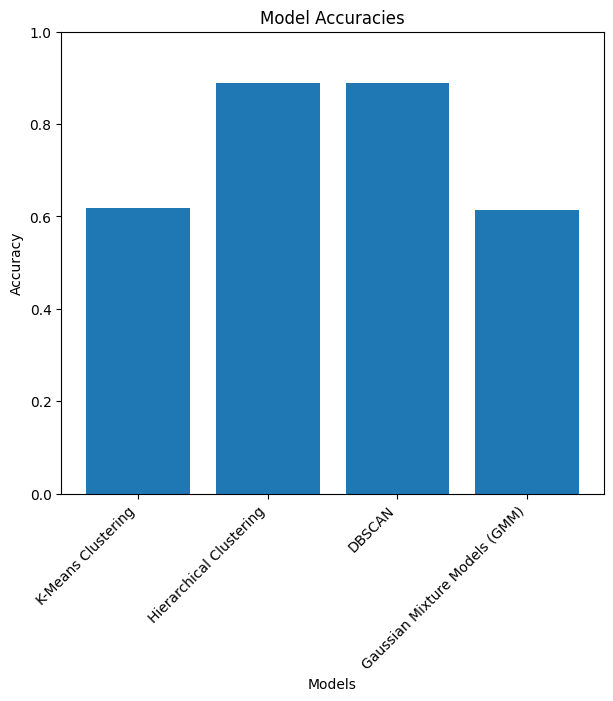

In [49]:
# Plotting the scores for each model 
models = {'K-Means Clustering':best_score_knn,
              'Hierarchical Clustering':best_score_dbscan,
              'DBSCAN':best_score_dbscan,
              'Gaussian Mixture Models (GMM)': best_score_gauss}
plt.figure(figsize=(7, 6))
plt.bar(models.keys(), models.values())
plt.xticks(rotation=45, ha='right')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
plt.show()